Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

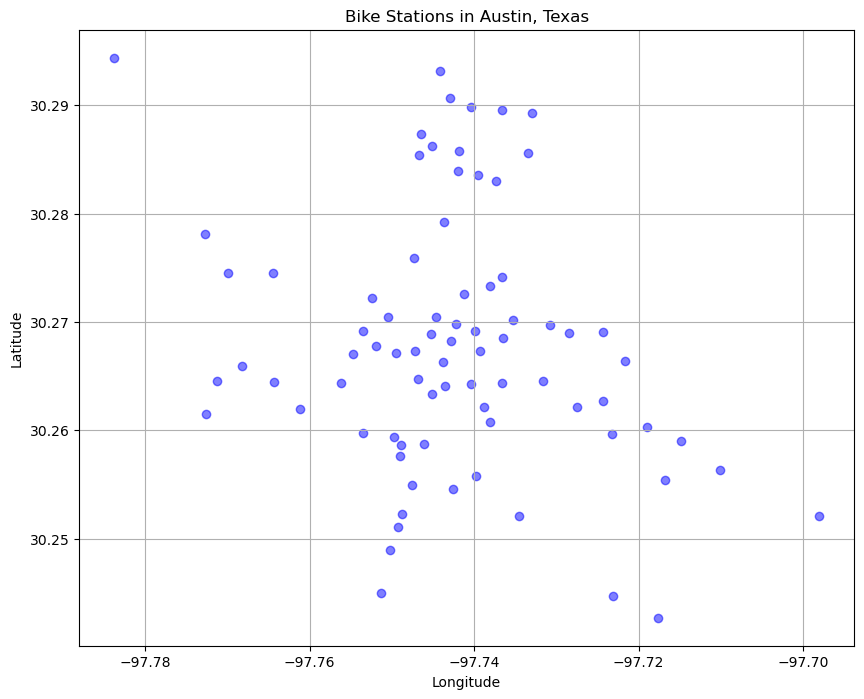

In [6]:
import requests
import matplotlib.pyplot as plt

# Function to retrieve bike station data for Austin from CityBikes API
def get_austin_bike_stations():
    api_url = "https://api.citybik.es/v2/networks/austin"
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        stations = data["network"]["stations"]
        return stations
    else:
        print("Failed to retrieve data from CityBikes API.")
        return None

# Function to create a scatter plot of bike stations in Austin
def plot_austin_bike_stations(stations):
    if stations is not None:
        lats = [station["latitude"] for station in stations]
        lngs = [station["longitude"] for station in stations]
        plt.figure(figsize=(10, 8))
        plt.scatter(lngs, lats, color='blue', alpha=0.5)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Bike Stations in Austin, Texas')
        plt.grid(True)
        plt.show()
    else:
        print("No data to plot.")

# Retrieve bike station data for Austin
austin_stations = get_austin_bike_stations()

# Plot bike stations in Austin
plot_austin_bike_stations(austin_stations)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.